<a href="https://colab.research.google.com/github/kushwahasuraj/EMAIL-SYSTEM/blob/master/final_project_Fake_news_by_using_visual_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from __future__ import print_function

import numpy as np
import pandas as pd
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
import keras
!pip install keras_applications
from keras_applications.imagenet_utils import _obtain_input_shape
from keras_applications.imagenet_utils import _obtain_input_shape # this will work for older versions of keras. 2.2.0 or before
from tensorflow.keras.utils import get_source_inputs


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
def VGGupdated(input_tensor=None,classes=2):    
   
    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')
    
    return model

In [23]:
model = VGGupdated(classes = 2) # fake and real

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/Colab Notebooks/news_dataset')

news_types = os.listdir('/content/drive/MyDrive/Colab Notebooks/news_dataset')
print (news_types)  #what kinds of news are in this dataset

print("Types of news found: ", len(dataset_path))


['real', 'fake']
Types of news found:  2


In [26]:
news = []

for item in news_types:
    # Get all the file names
    all_news = os.listdir('/content/drive/MyDrive/Colab Notebooks/news_dataset' + '/' +item)

 # Add them to the list
    for  images in all_news:
        news.append((item, str('/content/drive/MyDrive/Colab Notebooks/news_dataset' + '/' +item) + '/' + images))
        print(news)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
# Build a dataframe        
news_df = pd.DataFrame(data=news, columns=['label', 'image'])
print(news_df.head())
#print(news_df.tail())

  label                                              image
0  real  /content/drive/MyDrive/Colab Notebooks/news_da...
1  real  /content/drive/MyDrive/Colab Notebooks/news_da...
2  real  /content/drive/MyDrive/Colab Notebooks/news_da...
3  real  /content/drive/MyDrive/Colab Notebooks/news_da...
4  real  /content/drive/MyDrive/Colab Notebooks/news_da...


In [28]:
print("Total number of news in the dataset: ", len(news_df))
news_count = news_df['label'].value_counts()

print("rooms in each category: ")
print(news_count)

Total number of news in the dataset:  332
rooms in each category: 
real    204
fake    128
Name: label, dtype: int64


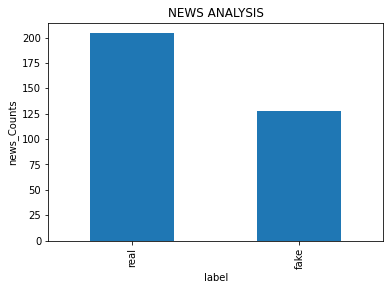

In [29]:
plt.title('NEWS ANALYSIS')
plt.xlabel('label')
plt.ylabel('news_Counts')
news_df['label'].value_counts().plot(kind="bar")
plt.show()

In [30]:
import cv2
import os
path = '/content/drive/MyDrive/Colab Notebooks/news_dataset/'
im_size = 300
images = []
labels = []

count = 0

for i in news_types:
    data_path = path + str(i) 
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        image_exists = os.path.isfile(data_path + '/' + f)
        
        if image_exists:
            img = cv2.imread(data_path + '/' + f)
            dim = (im_size, im_size)
            img = cv2.resize(img, dim)
        else:
            print('Wrong path:', data_path + '/' + f)
        
        images.append(img)
        labels.append(i)


In [31]:
images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(332, 300, 300, 3)

In [32]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=news_df['label'].values
#print(y[:5])

In [33]:
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer # Here is the one
y=y.reshape(-1,1)
#onehotencoder = OneHotEncoder(categorical_features=[0])  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
onehotencoder = ColumnTransformer([("images", OneHotEncoder(), [0])], remainder = 'passthrough')
Y= onehotencoder.fit_transform(y)
Y.shape  #(381, 2)

(332, 2)

In [35]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(315, 300, 300, 3)
(315, 2)
(17, 300, 300, 3)
(17, 2)


In [37]:
histroy =model.fit(train_x, train_y,epochs=10,batch_size = 63)

Epoch 1/10


ResourceExhaustedError: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title("Loss Function")
plt.ylabel("Accuracy and Loss")
plt.xlabel("epochs")
plt.show()

##Take input from User and Classify that image

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

img_path = '/content/drive/MyDrive/test1.jpg'

img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
y_pred = model.predict(x)
y_pred
y1 = y_pred[0][0]
y2 = y_pred[0][1]

if(y1 < y2):
  pred = 'Fake Image'
else:
  pred = 'Real Image'  

print("Our model says it is :", pred) 